In [1]:
import fenics as f
import matplotlib.pyplot as plt
from models import velocity_field, transient_t_transport_sim, mesh_2d, t_transport_sim
import numpy as np

----------  Running for dT=2 K  ----------*** Warning: Matplotlib plotting backend does not support mesh function of dim 1. Continuing without plotting...

Running for factor=1.0e-03
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
Running for factor=1.0e-02
  Newton iteration 0: r (abs) = 1.912e+05 (tol = 1.000e-09) r (rel) = 1.000e+00 (tol = 1.000e-09)
  Newton iteration 1: r (abs) = 7.153e-02 (tol = 1.000e-09) r (rel) = 3.741e-07 (tol = 1.000e-09)
  Newton iteration 2: r (abs) = 7.331e-06 (tol = 1.000e-09) r (rel) = 3.833e-11 (tol = 1.000e-09)
  Newton solver finished in 2 iterations and 2 linear solver iterations.
No Jacobian form specified for nonlinear variational problem.
Differentiating residual form F to obtain Jacobian J = F'.
Solving nonlinear variational problem.
Running for factor=1.0e-01
  Newton iteration 0: r (abs) = 7.949e-06 (tol = 1.000e-09) r (rel) = 1.000e

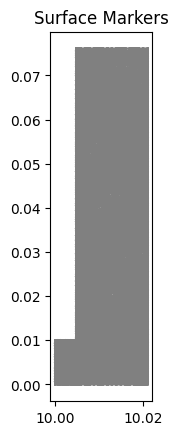

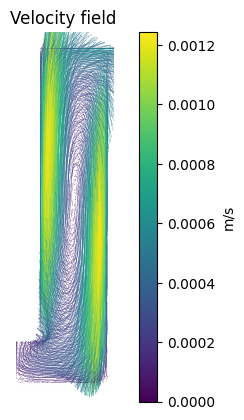

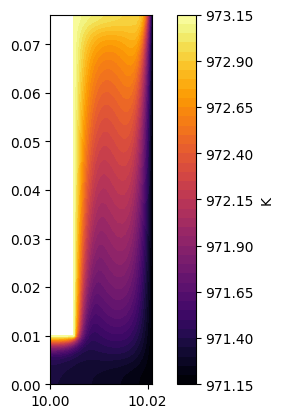

Defining initial values
Defining variational problem
Defining source terms
Defining boundary conditions
Time stepping...


RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to initialize vector of degrees of freedom for function.
*** Reason:  Cannot re-initialize a non-empty vector. Consider creating a new function.
*** Where:   This error was encountered inside Function.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  
*** -------------------------------------------------------------------------


In [2]:
if __name__ == "__main__":
    # Generating mesh
    # x1 = 0.00476
    # x2 = 0.0162
    # y1 = 0.01
    # y2 = 0.0761
    # resolution = 30
    # mesh_fenics, surface_markers, left_id, top_id, right_id, bottom_id, upper_left_id, left_top_id = LMeshmshr(x1, x2, y1, y2, resolution)

    mesh_fenics, volume_markers, surface_markers, correspondance_dict = mesh_2d()

    T_hot = 700 + 273.15
    dT = 2
    T_cold = T_hot - dT

    print(f"----------  Running for dT={dT} K  ----------")
    foldername = f"Results_Transient/dt={dT}/"
    u, p, T = velocity_field(
        T_cold=T_cold,
        T_hot=T_hot,
        my_mesh=mesh_fenics,
        surface_markers=surface_markers,
        correspondance_dict=correspondance_dict,
    )

    f.XDMFFile(foldername + "temperature_field.xdmf").write_checkpoint(
        T, "temperature", 1, f.XDMFFile.Encoding.HDF5
    )
    f.XDMFFile(foldername + "velocity_field.xdmf").write(u)

    plt.figure()
    plt.title("Velocity field")
    CS = f.plot(u, scale=1e-3)
    plt.colorbar(CS, label="m/s")
    plt.axis("off")
    plt.show()

    plt.figure()
    TS = f.plot(T, cmap="inferno")
    plt.colorbar(TS, label="K")
    plt.show()

    top_flux, wall_flux, t = transient_t_transport_sim(
        T,
        mesh_fenics,
        u,
        volume_markers=volume_markers,
        surface_markers=surface_markers,
        correspondance_dict=correspondance_dict,
    )

    plt.figure()
    plt.plot(t, wall_flux.data, "-x", linewidth=3)
    plt.plot(t, top_flux.data, "-x", linewidth=3)

    wall_release = np.cumsum(wall_flux)
    top_release = np.cumsum(top_flux)

    plt.figure()
    plt.plot(t, wall_release, "-x", linewidth=3)
    plt.plot(t, top_release, "-x", linewidth=3)